In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cuml.manifold import TSNE
from cuml.cluster import KMeans

In [3]:
import cuml
cuml.__version__

'0.15.0'

In [4]:
news = pd.read_csv('../data/datasets_25254_32181_reuters-newswire-2017-edited.csv')

In [5]:
w2v_sm = np.load('../weights/representations/en-core-sm-representations.npy')
w2v_md = np.load('../weights/representations/en-core-md-representations.npy')
w2v_lg = np.load('../weights/representations/en-core-lg-representations.npy')

bert_base = np.load('../weights/representations/bert-base-representation.npy')
bert_large = np.load('../weights/representations/bert-large-representation.npy')
roberta_base = np.load('../weights/representations/roberta-base-representation.npy')
roberta_large = np.load('../weights/representations/roberta-large-representation.npy')

In [6]:
tsne = TSNE(
    n_components = 2,
    learning_rate_method='none', 
    perplexity=50, 
    n_neighbors=32, 
    n_iter=1000,
    metric='cosine'
)

/home/shpotes/bin/anaconda3/envs/cluster/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: TSNE does not support cosine but only Euclidean. Will do in the near future.
  import sys


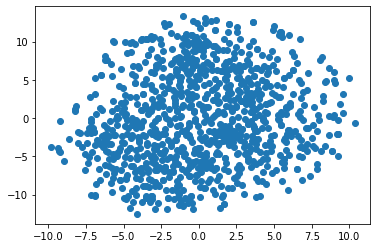

In [7]:
plt.scatter(*tsne.fit_transform(w2v_sm).T)

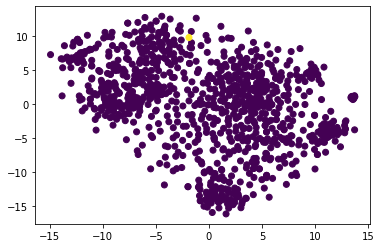

In [37]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(w2v_md)
plt.scatter(*tsne.fit_transform(w2v_md).T, c=clusters)

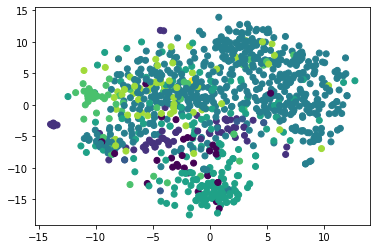

In [20]:
plt.scatter(*tsne.fit_transform(w2v_lg).T, c=news.category)

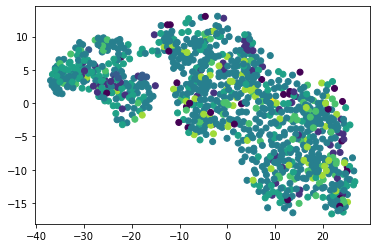

In [21]:
plt.scatter(*tsne.fit_transform(bert_base).T, c=news.category)

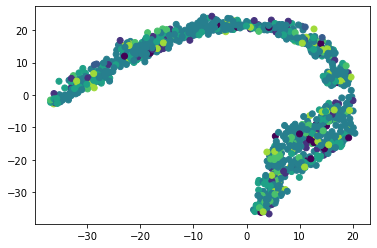

In [22]:
plt.scatter(*tsne.fit_transform(bert_large).T, c=news.category)

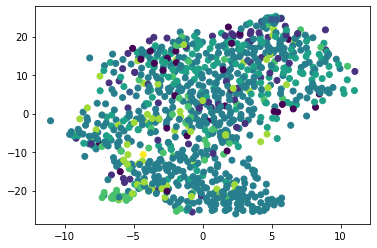

In [23]:
plt.scatter(*tsne.fit_transform(roberta_base).T, c=news.category)

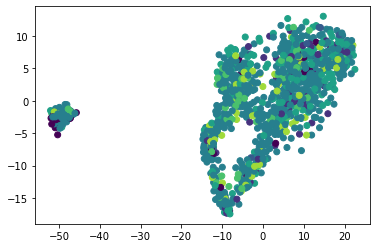

In [24]:
plt.scatter(*tsne.fit_transform(roberta_large).T, c=news.category)